# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

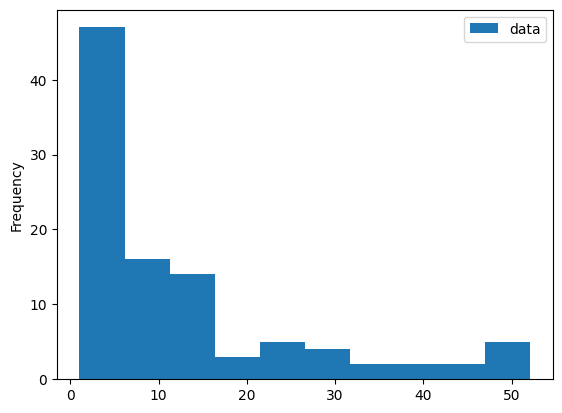

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

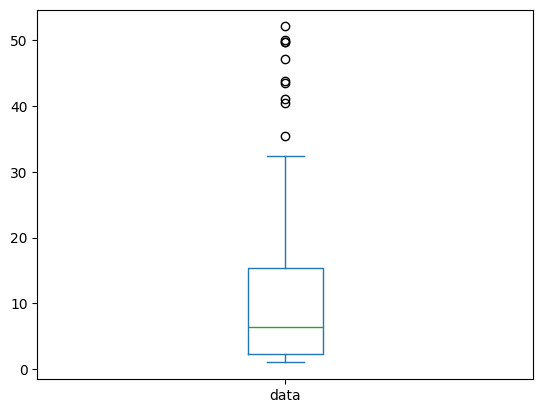

In [3]:
df.plot.box()

#### Answer

Like last week, I would choose the Histogram since this better shows the amount of drugs that fall within each price band. However, the box plot also shows the mean and quartiles which could be desired. That being said, the box plot is less clear about how many drugs are expensive, since it is difficult to differentiate the points at the top of the graph. Therefore, I think something like a Swarm plot could be better for this kind of visualization. For both plots, it would be important to add more information, like a title, axis labels, and unit information. You could also add a line for the mean/median on the Histogram to make it more informative like the Box plot. 

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!
    - *I would conclude that different states have different rates of incident that appear to be more than just random since there is noticeable skew and outliers. This is useful since we can preform correlation analysis between different features to show links between them and then analyze where improvements to education and safety could be made.*

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?
    - *The overall shape is fairly normal, with differences between features.*

- Are there any outliers present?  (Data points that are far from the others.)
    - *As seen in the Box plots, there are outliers in almost all features. The feature with the most outliers is drivers_with_accident, which is the only feature to have lower outliers.*

- If there are multiple related histograms, how does the distribution change across different groups?
    - *There are not related histograms, though there is drivers_with_incident which encompasses 3 other features within it, and they are all right skewed, which shows that they could be related.*

- What are the minimum and maximum values represented in each histogram?
    - *avg_yearly_miles: (6626, 8686)*
    - *drivers_with_speeding_ticket: (0.0185, 0.095)*
    - *drivers_with_accident: (0.0246, 0.0791)*
    - *drivers_with_dui: (0.0029, 0.0272)*
    - *drivers_with_incident: (0.0592, 0.1495)*





- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?
    - *I initally had less bins, however, when I changed it to 20, it revealed what appeared to be outliers in the data for some features, with gaps in between caused by bins with 0 data.*

- Does the distribution appear normal, or does it have a different distribution?
    - *For the different features, they are skewed in different directions. For example, drivers_with_speeding_ticket is right-skewed while average_yearly_miles is slightly left skewed*

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('driving_incident_rates_by_state_000.csv', header=0)
df.columns

Index(['state_id', 'state_name', 'avg_yearly_miles',
       'drivers_with_speeding_ticket', 'drivers_with_accident',
       'drivers_with_dui', 'drivers_with_incident', 'last_updated_on'],
      dtype='object')

In [13]:
df.head()

,state_id,state_name,avg_yearly_miles,drivers_with_speeding_ticket,drivers_with_accident,drivers_with_dui,drivers_with_incident,last_updated_on
0,IL,Illinois,7187,0.0279,0.0401,0.0042,0.0670,2025-02-02
1,KY,Kentucky,7438,0.0317,0.0474,0.0078,0.0787,2025-02-02
2,MA,Massachusetts,7669,0.0325,0.0791,0.0060,0.1025,2025-02-02
3,NJ,New Jersey,7050,0.0324,0.0499,0.0052,0.0790,2025-02-02
4,ND,North Dakota,7491,0.0950,0.0538,0.0246,0.1495,2025-02-02


In [45]:
for feature in ['avg_yearly_miles', 'drivers_with_speeding_ticket', 'drivers_with_accident', 'drivers_with_dui', 'drivers_with_incident']:
    print(f'{feature} Min: {df[feature].min()}')
    print(f'{feature} Max: {df[feature].max()}\n')

avg_yearly_miles Min: 6626
avg_yearly_miles Max: 8686

drivers_with_speeding_ticket Min: 0.0185
drivers_with_speeding_ticket Max: 0.095

drivers_with_accident Min: 0.0246
drivers_with_accident Max: 0.0791

drivers_with_dui Min: 0.0029
drivers_with_dui Max: 0.0272

drivers_with_incident Min: 0.0592
drivers_with_incident Max: 0.1495



In [17]:
for feature in ['avg_yearly_miles', 'drivers_with_speeding_ticket', 'drivers_with_accident', 'drivers_with_dui', 'drivers_with_incident']:
    print(f'{feature} Mean: {df[feature].mean()}')
    print(f'{feature} Median: {df[feature].median()}\n')
    # print(f'{feature} Mode: {df[feature].mode()}') Mode doesn't mean much since they all have multiple

avg_yearly_miles Mean: 7404.403846153846
avg_yearly_miles Median: 7438.0

drivers_with_speeding_ticket Mean: 0.044494230769230765
drivers_with_speeding_ticket Median: 0.040499999999999994

drivers_with_accident Mean: 0.054882692307692306
drivers_with_accident Median: 0.05395

drivers_with_dui Mean: 0.009136538461538463
drivers_with_dui Median: 0.00785

drivers_with_incident Mean: 0.09851923076923079
drivers_with_incident Median: 0.09725



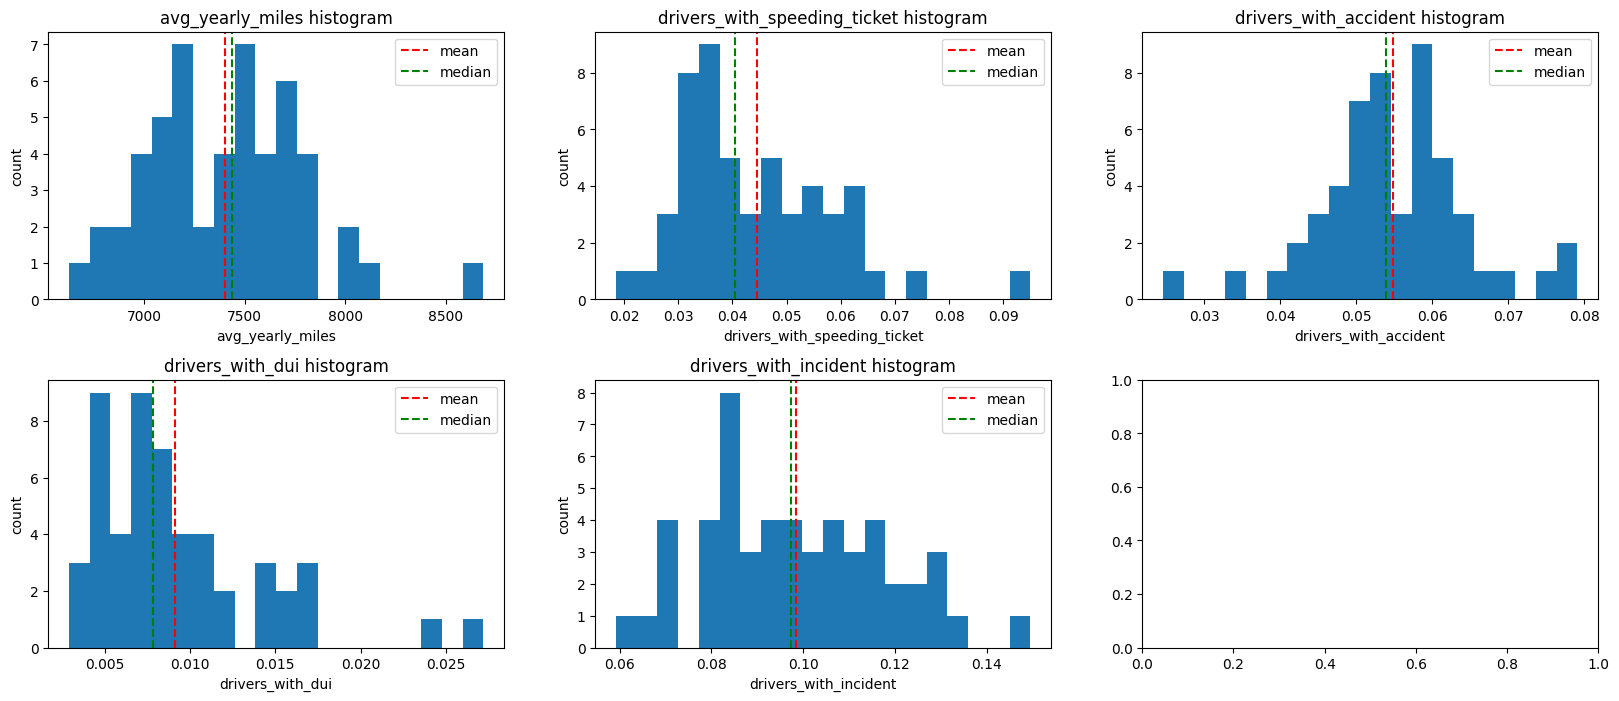

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(20,8))
axes = axes.flatten()
for i, feature in enumerate(['avg_yearly_miles', 'drivers_with_speeding_ticket', 'drivers_with_accident', 'drivers_with_dui', 'drivers_with_incident']):
    axes[i].hist(df[feature], bins=20)
    axes[i].set_title(f'{feature} histogram')
    axes[i].axvline(df[feature].mean(), c='red', label='mean', linestyle='--')
    axes[i].axvline(df[feature].median(), c='green', label='median', linestyle='--')
    axes[i].legend()
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('count')
plt.subplots_adjust(hspace=.3)
plt.show()

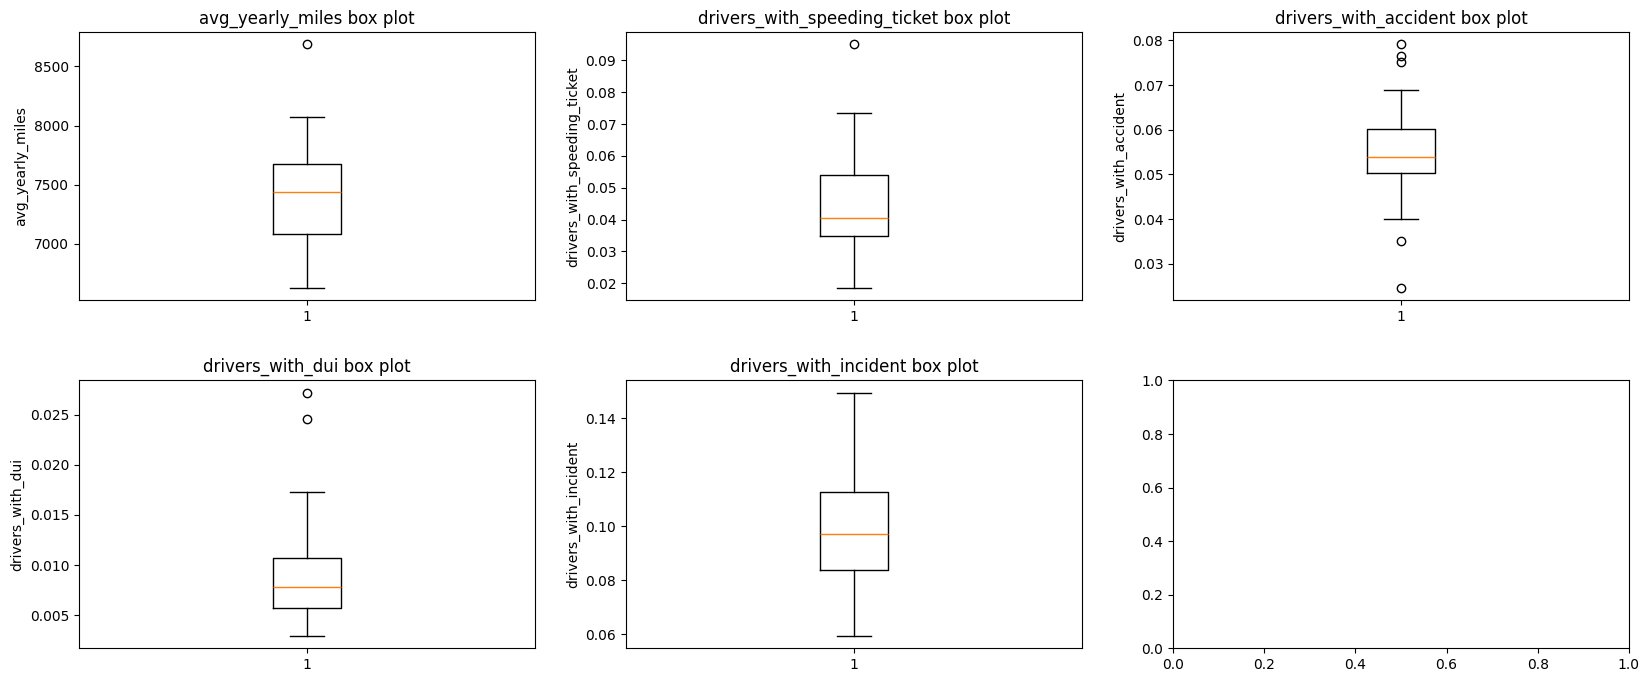

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(20,8))
axes = axes.flatten()
for i, feature in enumerate(['avg_yearly_miles', 'drivers_with_speeding_ticket', 'drivers_with_accident', 'drivers_with_dui', 'drivers_with_incident']):
    axes[i].boxplot(df[feature])
    axes[i].set_title(f'{feature} box plot')
    axes[i].set_ylabel(feature)
plt.subplots_adjust(hspace=.3)
plt.show()

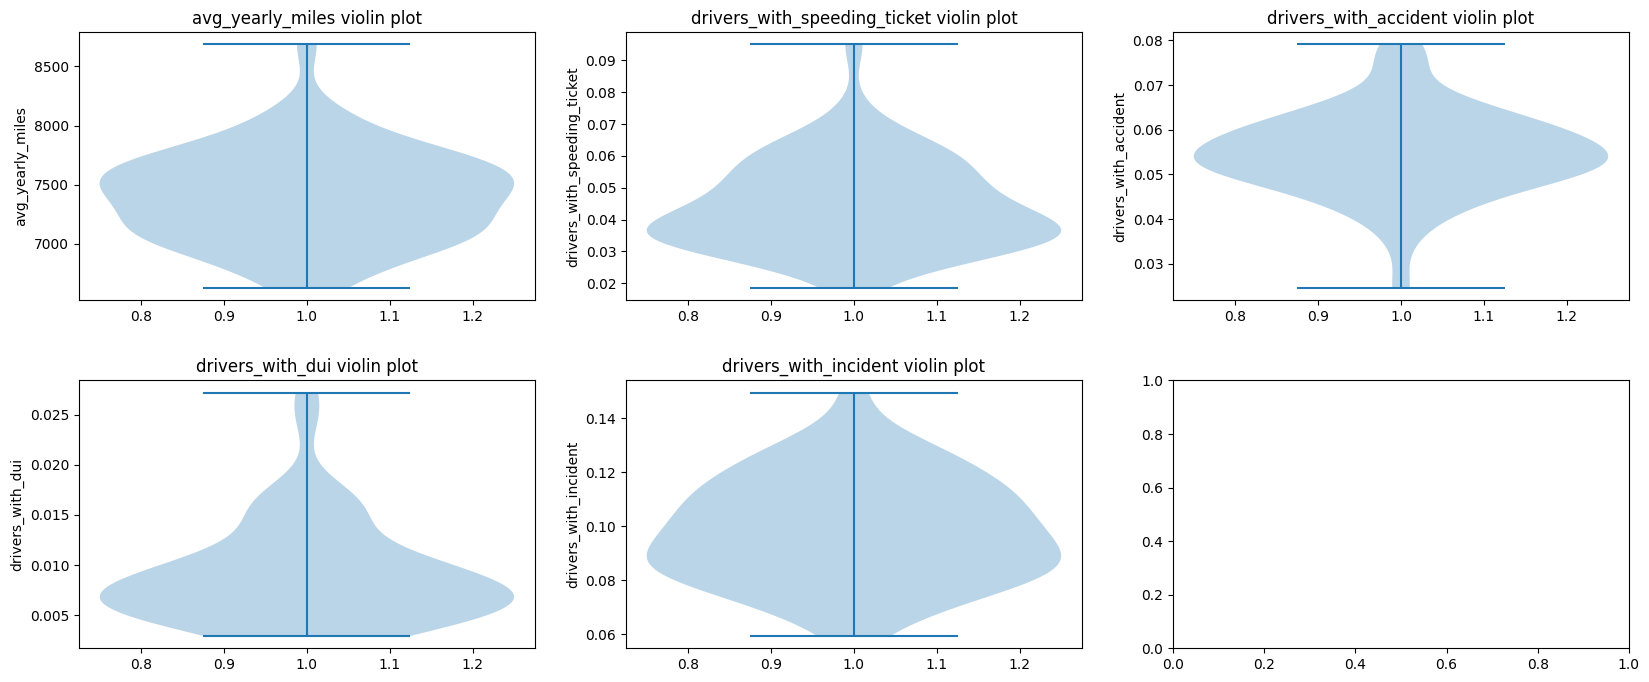

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(20,8))
axes = axes.flatten()
for i, feature in enumerate(['avg_yearly_miles', 'drivers_with_speeding_ticket', 'drivers_with_accident', 'drivers_with_dui', 'drivers_with_incident']):
    axes[i].violinplot(df[feature])
    axes[i].set_title(f'{feature} violin plot')
    axes[i].set_ylabel(feature)
plt.subplots_adjust(hspace=.3)
plt.show()

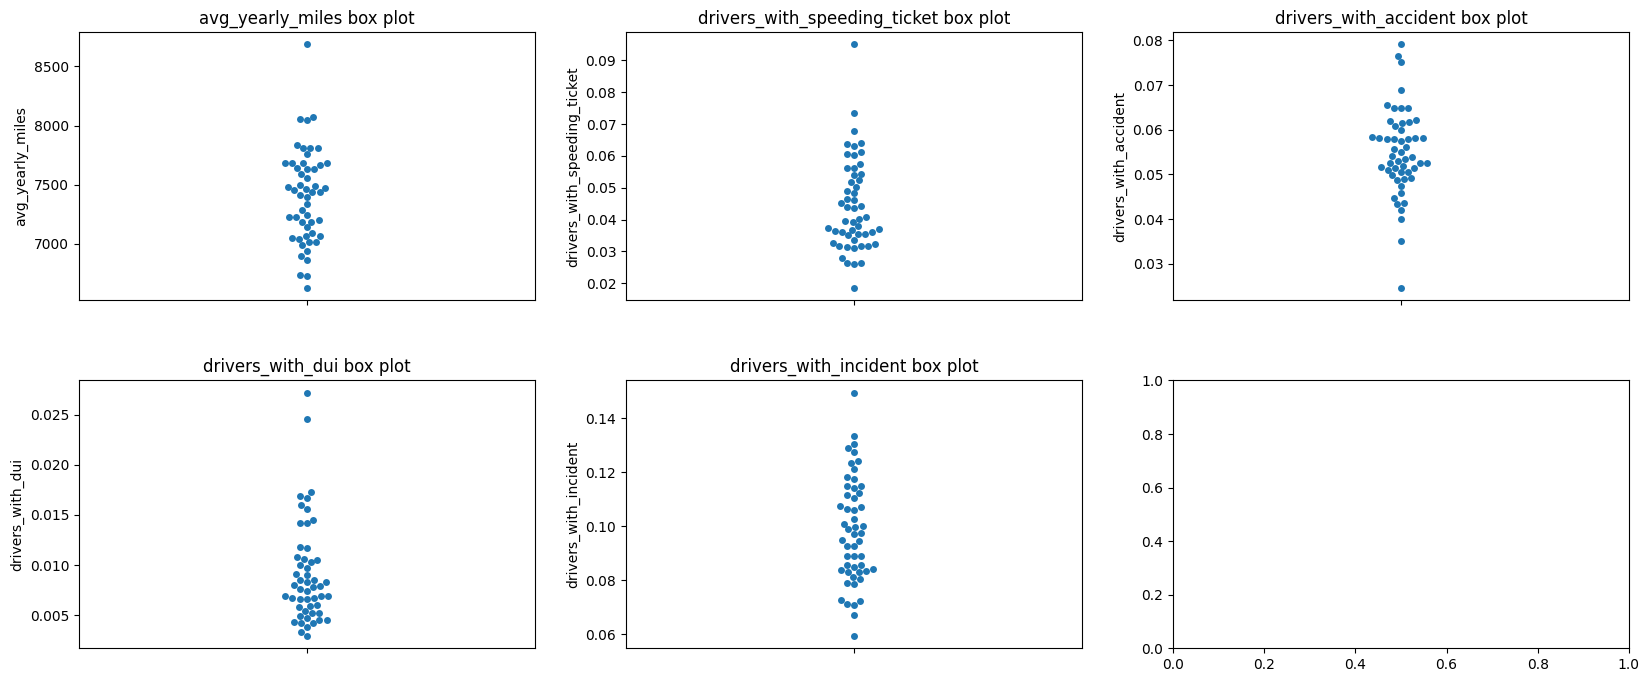

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(20,8))
axes = axes.flatten()
for i, feature in enumerate(['avg_yearly_miles', 'drivers_with_speeding_ticket', 'drivers_with_accident', 'drivers_with_dui', 'drivers_with_incident']):
    sns.swarmplot(df[feature], ax=axes[i])
    axes[i].set_title(f'{feature} box plot')
    axes[i].set_ylabel(feature)
plt.subplots_adjust(hspace=.3)
plt.show()

Since there is only one entry for each Categorical Variable, Bar plots wont show anything but a row of 50 1's

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

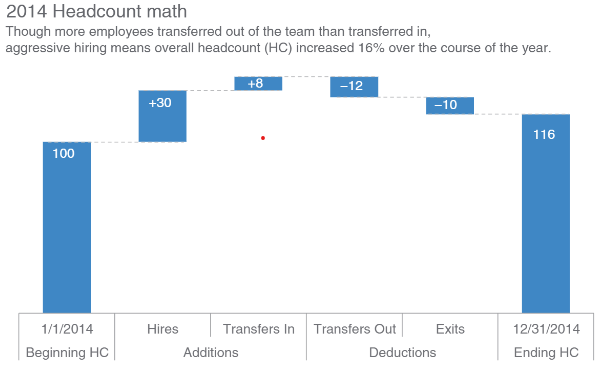

In [63]:
import plotly.graph_objects as go
data = [100, 30, 8, -12, -10, -116]
cumulative = np.cumsum(data)

fig = go.Figure(go.Waterfall(
    x=['1/1/2014 Beginning HC', 'Hires', 'Transfers In', 'Transfers Out', 'Exits', '12/31/2014 Ending HC'],
    text=['100', '+30', '+8', '-12', '-10', '-116'],
    textposition='inside',
    y = data,
    measure = ['relative', 'relative', 'relative', 'relative', 'relative', 'relative', 'total'],
    connector_visible = True,
))

fig.update_layout(
        title = "2014 Headcount math",
        showlegend = True
)

fig.show()
